In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
car = pd.read_csv(r"V:\DS\part 1\quikr_car.csv")
car.head(3)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol


In [3]:
car.shape

(892, 6)

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


## Quality

In [5]:
## 1. year has many non year value 
## 2. year bbject to int 
## 3. Price has ask for price
## 4. price obj to int 
## 5. kms_driven has kms with int 
## 6. kms_driven obj to int 
## kms_driven has nan value
## keep first 3 words of name      ### these atre required for cleaning

In [6]:
car["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [7]:
# car["Price"].unique()

In [8]:
car['year'].str.isnumeric()

0       True
1       True
2       True
3       True
4       True
       ...  
887    False
888     True
889     True
890     True
891     True
Name: year, Length: 892, dtype: bool

In [9]:
car = car[car['year'].str.isnumeric()]

In [10]:
car["year"] = car["year"].astype(int)

In [11]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int64 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.0+ KB


In [12]:
# remove rows where Price = "Ask For Price"
car = car[car["Price"] != "Ask For Price"].copy()

# now clean commas and convert to int
car["Price"] = car["Price"].str.replace(",", "", regex=False).astype(int)


In [13]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int64 
 3   Price       819 non-null    int64 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.8+ KB


In [14]:
car["kms_driven"]

0        45,000 kms
1            40 kms
3        28,000 kms
4        36,000 kms
6        41,000 kms
           ...     
886    1,32,000 kms
888      27,000 kms
889      40,000 kms
890          Petrol
891          Petrol
Name: kms_driven, Length: 819, dtype: object

In [15]:
car["kms_driven"] = car["kms_driven"].str.split(" ").str.get(0).str.replace(",", "")

In [16]:
car["kms_driven"]

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
886    132000
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 819, dtype: object

In [17]:
car = car[car["kms_driven"].str.isnumeric()]

In [18]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.7+ KB


In [19]:
car["kms_driven"] = car["kms_driven"].astype(int)

In [20]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [21]:
car["fuel_type"].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [22]:
car = car[~car["fuel_type"].isna()]

In [23]:
car["name"]

0        Hyundai Santro Xing XO eRLX Euro III
1                     Mahindra Jeep CL550 MDI
3      Hyundai Grand i10 Magna 1.2 Kappa VTVT
4            Ford EcoSport Titanium 1.5L TDCi
6                                   Ford Figo
                        ...                  
883                Maruti Suzuki Ritz VXI ABS
885                 Tata Indica V2 DLE BS III
886                      Toyota Corolla Altis
888                       Tata Zest XM Diesel
889                        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

In [24]:
car["name"] = car["name"].str.split(" ").str.slice(0, 3).str.join(" ")    ## first we split the str, nxt onlybtake the first 3 words and after that we join the words using space

In [25]:
car = car.reset_index(drop=True)

In [26]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [27]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [28]:
car[car["Price"] > 6e6]

,name,company,year,Price,kms_driven,fuel_type
534,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [29]:
car = car[car["Price"] < 6e6].reset_index(drop=True)

In [30]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [31]:
## let svae this clean data into a csv file

In [32]:
car.to_csv("cleaned_car.csv")

### Model Bulding

In [33]:
x = car.drop(columns="Price")
y = car["Price"]

In [34]:
x

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
811,Tata Indica V2,Tata,2009,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,132000,Petrol
813,Tata Zest XM,Tata,2018,27000,Diesel


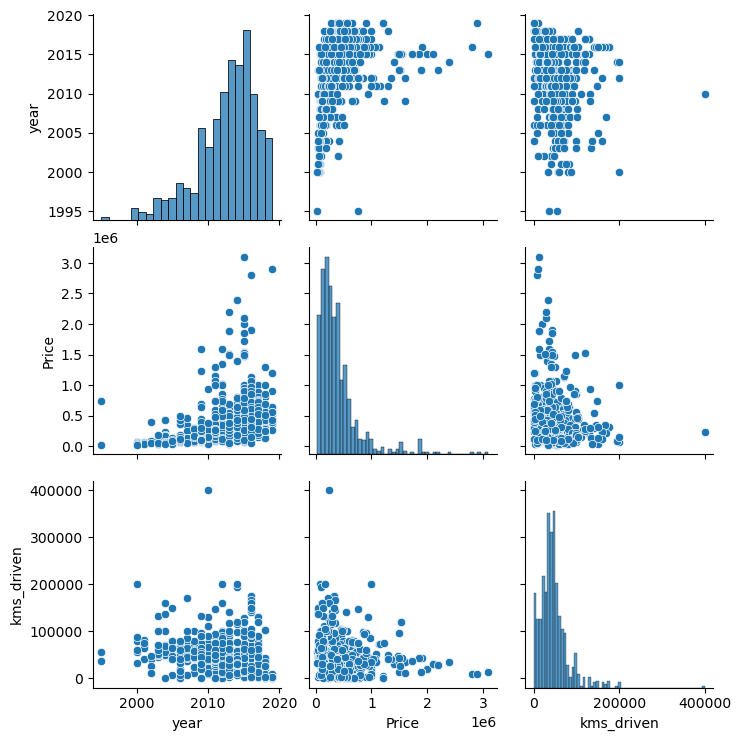

In [35]:
sns.pairplot(car)
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [38]:
ohe = OneHotEncoder()
ohe.fit(x[["name", "company", "fuel_type"]])

OneHotEncoder()

In [39]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_), ["name", "company", "fuel_type"]),
                                      remainder="passthrough")

In [40]:
lr = LinearRegression()

In [41]:
pipe = make_pipeline(column_trans, lr)

In [42]:
pipe.fit(x_train, y_train)

C:\Users\TUHIN BERA\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [43]:
y_prd = pipe.predict(x_test)

In [44]:
y_prd

array([  30223.4212208 ,  397700.05982725,  401622.84543888,
        477878.77583265,  397110.76398154,  450597.76620862,
         98504.51198177,  243749.21504783,  459646.72891244,
        199683.76901368,  382296.62825702,  328357.29121366,
        691373.98202103,  192068.78425989, 2036026.33323575,
        365210.69438417,  612858.70471903,  349806.15550822,
        943211.06220549,  249075.8502339 ,  371031.46946687,
        121645.64035759,  458897.51429667,  603402.93067593,
        359212.09332622,  355418.11186037,  458920.90766952,
        732940.40344656,  368345.66526702,  605545.71776515,
        692385.42175233,  407546.91532462,  174752.34382556,
        128388.5718995 ,  577946.76908715,  193103.51251433,
        382460.88941297,  634776.10379604,  486721.83685672,
        657125.77145203,  254792.15639479,  469419.08701057,
        -50897.87553314,  532695.2947045 ,  301378.47838999,
        252375.80758625,  412580.63545277, -124421.12383305,
        127242.5739992 ,

In [45]:
r2_score(y_test, y_prd)

0.573163946242421

In [46]:
score = []
for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans, lr)
    pipe.fit(x_train, y_train)
    y_prd = pipe.predict(x_test)
    score.append(r2_score(y_test, y_prd))

In [47]:
import numpy as np

In [48]:
np.argmax(score)

np.int64(433)

In [49]:
score[np.argmax(score)]

0.8457042416667213

In [50]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=433)
lr = LinearRegression()
pipe = make_pipeline(column_trans, lr)
pipe.fit(x_train, y_train)
y_prd = pipe.predict(x_test)
r2_score(y_test, y_prd)

0.8457042416667213

In [51]:
import pickle

In [52]:
# pickle.dump(pipe, open("Liner_regressionmodel.pkl", "wb"))

In [53]:
pipe.predict(pd.DataFrame([["Maruti Suzuki Swift", "Maruti", 2019, 100, "Petrol"]], columns=["name", "company", "year", "kms_driven", "fuel_type"]))

array([458900.81022717])